In [82]:
# Importing the basic libraries we will require for the project

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the Machine Learning models we require from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Importing the other functions we may require from Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

# To get diferent metric scores
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,plot_confusion_matrix,precision_recall_curve,roc_curve,make_scorer

# mcdaniel: i had to add these two for the dtree sections.
from sklearn import metrics
from sklearn import tree


# Code to ignore warnings from function usage
import warnings;
import numpy as np
warnings.filterwarnings('ignore')

In [83]:
data_orig = pd.read_csv("out/out_train.csv")
data = data_orig.copy()

Create heat maps

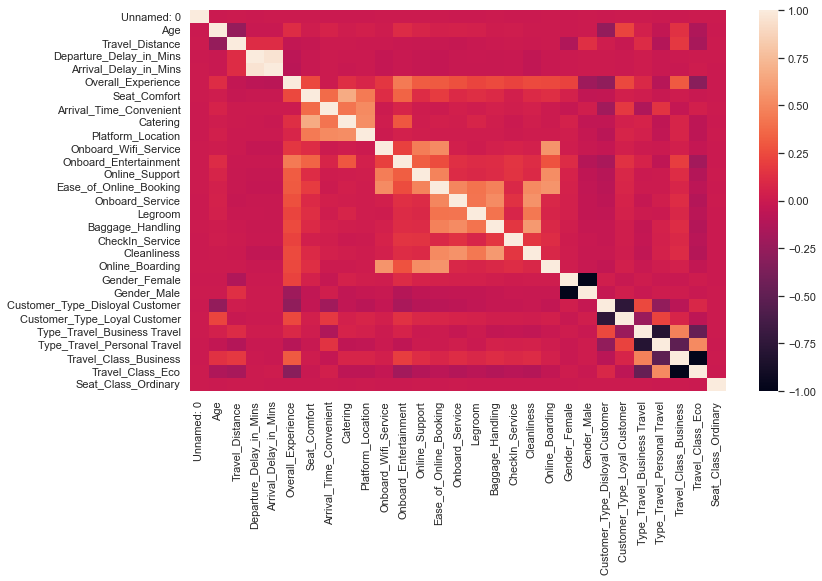

In [84]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(data.corr())
plt.show()

* Ease_of_Online_Booking
* Onboard_Service
* Online Boarding
* Legroom
* Baggage Handling

Onboard_Wifi_Service Vs Ease_of_Online_Booking
Onboard_Wifi_Service Vs Online_Support

Seat_Comfort Vs Catering
Arrival_Time_Convenient Vs Platform_Location
Catering Vs Platform_Location

Secondary factors
- Travel_Class_Business
- 


**Separating the independent variables (X) and the dependent variable (Y)**

In [92]:
X = pd.read_csv("out/out_train.csv").copy()
y = X["Overall_Experience"]

X.drop(columns = X.columns[0], axis = 1, inplace= True)
X = X.drop(["Overall_Experience"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,stratify=Y, random_state=1)


In [94]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66065 entries, 90112 to 68264
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              66065 non-null  float64
 1   Travel_Distance                  66065 non-null  int64  
 2   Departure_Delay_in_Mins          66065 non-null  float64
 3   Arrival_Delay_in_Mins            66065 non-null  float64
 4   Seat_Comfort                     66065 non-null  float64
 5   Arrival_Time_Convenient          66065 non-null  float64
 6   Catering                         66065 non-null  float64
 7   Platform_Location                66065 non-null  float64
 8   Onboard_Wifi_Service             66065 non-null  float64
 9   Onboard_Entertainment            66065 non-null  float64
 10  Online_Support                   66065 non-null  float64
 11  Ease_of_Online_Booking           66065 non-null  float64
 12  Onboard_Servic

In [95]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 66065 entries, 90112 to 68264
Series name: Overall_Experience
Non-Null Count  Dtype
--------------  -----
66065 non-null  int64
dtypes: int64(1)
memory usage: 1.0 MB


In [96]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28314 entries, 81488 to 42255
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              28314 non-null  float64
 1   Travel_Distance                  28314 non-null  int64  
 2   Departure_Delay_in_Mins          28314 non-null  float64
 3   Arrival_Delay_in_Mins            28314 non-null  float64
 4   Seat_Comfort                     28314 non-null  float64
 5   Arrival_Time_Convenient          28314 non-null  float64
 6   Catering                         28314 non-null  float64
 7   Platform_Location                28314 non-null  float64
 8   Onboard_Wifi_Service             28314 non-null  float64
 9   Onboard_Entertainment            28314 non-null  float64
 10  Online_Support                   28314 non-null  float64
 11  Ease_of_Online_Booking           28314 non-null  float64
 12  Onboard_Servic

In [97]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))


Shape of Training set :  (66065, 27)
Shape of test set :  (28314, 27)
Percentage of classes in training set:
1    0.546659
0    0.453341
Name: Overall_Experience, dtype: float64


**create a function to calculate and print the classification report and confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [98]:
# Creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Satisfied', 'Unsatisfied'], yticklabels=['Unsatisfied', 'Satisfied'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Logistic Regression Model**

In [99]:
# Fitting logistic regression model
lg=LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

**Evaluate the model on the training set**

              precision    recall  f1-score   support

           0       0.74      0.77      0.76     29950
           1       0.80      0.77      0.79     36115

    accuracy                           0.77     66065
   macro avg       0.77      0.77      0.77     66065
weighted avg       0.77      0.77      0.77     66065



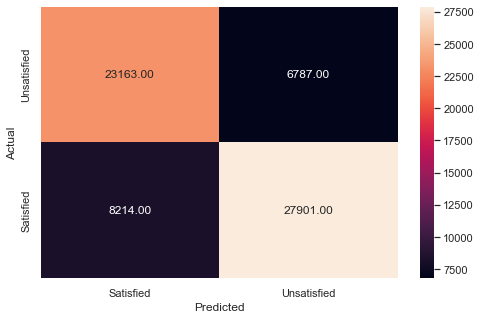

In [100]:
y_pred_train = lg.predict(X_train)
metrics_score(y_train, y_pred_train)

**Evaluate the model on the test set**

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     12836
           1       0.81      0.77      0.79     15478

    accuracy                           0.78     28314
   macro avg       0.78      0.78      0.78     28314
weighted avg       0.78      0.78      0.78     28314



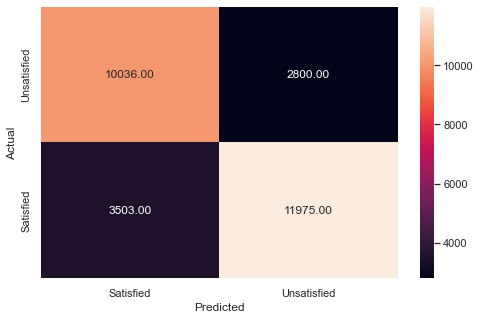

In [101]:
y_pred_test = lg.predict(X_test)
metrics_score(y_test, y_pred_test)